# **预处理preprocessing**

## **MinMaxScaler（归一化）**

In [1]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
#不太熟悉numpy的小伙伴，能够判断data的结构吗？
#如果换成表是什么样子？
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [2]:
#实现归一化
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(data) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(data) #通过接口导出结果
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
result_ = scaler.fit_transform(data) #训练和导出结果一步达成
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [7]:
scaler.inverse_transform(result) #将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [11]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data
scaler = MinMaxScaler(feature_range=[5,10]) #依然实例化

result = scaler.fit_transform(data) #fit_transform一步导出结果
result
#当X中的特征数量非常多的时候，fit会报错并表示，数据量太大了我计算不了
#此时使用partial_fit作为训练接口
#scaler = scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

numpy来实现归一化

In [12]:
import numpy as np
X = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
#归一化
X_nor = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_nor


array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [13]:
#逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## **StandardScaler(标准化)**

In [15]:
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [16]:
scaler = StandardScaler() #实例化
scaler.fit(data) #fit，本质是生成均值和方差
scaler.mean_ #查看均值的属性mean_

scaler.var_ #查看方差的属性var_

x_std = scaler.transform(data) #通过接口导出结果
x_std.mean() #导出的结果是一个数组，用mean()查看均值

x_std.std() #用std()查看方差


array([-0.125,  9.   ])

In [20]:
scaler.fit_transform(data) #使用fit_transform(data)一步达成结果
scaler.inverse_transform(x_std) #使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## **impute.SimpleImputer缺失值**


In [21]:
import pandas as pd
data = pd.read_csv("data/Narrativedata.csv",index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


 
**class sklearn.impute.SimpleImputer (missing_values=nan, strategy=’mean’, fill_value=None, verbose=0,
copy=True):**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [26]:
#填补年龄
Age = data.loc[:,"Age"].values.reshape(-1,1) #sklearn当中特征矩阵必须是二维
Age[:5]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.]])

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer() # 默认均值填补
imp_median = SimpleImputer(strategy="median") # 中位数填补
imp_0 = SimpleImputer(strategy='constant',fill_value=0) # 用0填补

In [ ]:
imp_mean = imp_mean.fit_transform(Age) #fit_transform一步完成调取结果
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)
imp_mean[:20]

imp_median[:20]

imp_0[:20]
#在这里我们使用中位数填补Age
data.loc[:,"Age"] = imp_median


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [35]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)

imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


用Pandas和Numpy进行填补其实更加简单

In [36]:
import pandas as pd
data = pd.read_csv("data/Narrativedata.csv",index_col=0)
data.head()
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False

## **处理分类型特征：编码与哑变量**

**LabelEncoder标签分类**

In [48]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1] #要输入的是标签，不是特征矩阵，所以允许一维
le = LabelEncoder() #实例化
le = le.fit(y) #导入数据
label = le.transform(y) #transform接口调取结果
le.classes_ #属性.classes_查看标签中究竟有多少类别

# label #查看获取的结果label


array(['No', 'Unknown', 'Yes'], dtype=object)

In [ ]:
le.fit_transform(y) #也可以直接fit_transform一步到位

In [ ]:
le.inverse_transform(label) #使用inverse_transform可以逆转

In [ ]:
data.iloc[:,-1] = label #让标签等于我们运行出来的结果
data.head()

In [50]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

**OrdinalEncoder特征分类**

In [51]:
from sklearn.preprocessing import OrdinalEncoder
#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
data_ = data.copy()
data_.head()
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [52]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


**OneHotEncoder：独热编码，创建哑变量**

In [56]:
from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]

#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
result = OneHotEncoder(categories='auto').fit_transform(X).toarray()

#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [57]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns =["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


## **处理连续型特征：二值化与分段**

**Binarizer二值化**

In [62]:
#将年龄二值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer
X = data_2.iloc[:,0].values.reshape(-1,1) #类为特征专用，所以不能使用一维数组
transformer = Binarizer(threshold=30).fit_transform(X)
transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

**KBinsDiscretizer分箱处理**

In [58]:
from sklearn.preprocessing import KBinsDiscretizer


In [59]:
X = data.iloc[:,0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)


array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [60]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())


{0.0, 1.0, 2.0}

In [61]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# **特征选择feature_selection**

特征提取
(feature extraction)
特征创造
(feature creation)
特征选择
(feature selection)

我们有四种方法可以用来选择特征：过滤法，嵌入法，包装法，和降维算法。

## **Filter过滤法**

In [1]:
"""
这个数据量相对夸张，如果使用支持向量机和神经网络，很可能会直接跑不出来。使用KNN跑一次大概需要半个小时。
用这个数据举例，能更够体现特征工程的重要性。
"""
#导入数据，让我们使用digit recognizor数据来一展身手
import pandas as pd
data = pd.read_csv("data/digit recognizor.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

### **方差过滤**

In [3]:
from sklearn.feature_selection import VarianceThreshold
X_var0 = VarianceThreshold().fit_transform(X)
X_var0.shape

(42000, 708)

In [7]:
import numpy as np
np.median(X.var().values)
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X_fsvar.shape

(42000, 392)

In [6]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

### **相关性过滤**

卡方检验

In [8]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [9]:
#假设在这里我一直我需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 300)

In [11]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_fschi,y,cv=5).mean()

0.9597619047619048

In [ ]:
#超参数K学习曲线
%matplotlib inline
import matplotlib.pyplot as plt
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)


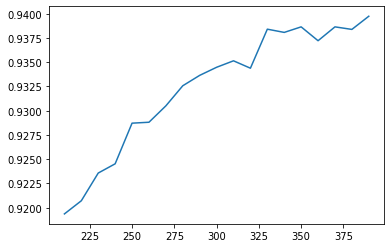

In [17]:

plt.plot(range(390,200,-10),score)
plt.show()

In [21]:
#接下来我们就来介绍一种更好的选择k的方法：看p值选择k
chivalue, pvalues_chi = chi2(X_fsvar,y)
chivalue
pvalues_chi

#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chivalue.shape[0] - (pvalues_chi < 0.05).sum()
k
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0

**F检验**  
F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。

In [25]:
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar,y)
F

pvalues_f
k = F.shape[0] - (pvalues_f < 0.05).sum()
k
#X_fsF = SelectKBest(f_classif, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsF,y,cv=5).mean()

0

**互信息法**  
互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法.返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关.

In [27]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X_fsvar,y)
result

array([0.06847518, 0.0915584 , 0.10739002, 0.11478178, 0.11195198,
       0.10377154, 0.07623834, 0.05118624, 0.07136441, 0.09762024,
       0.11159484, 0.14141529, 0.15759462, 0.16180123, 0.15487285,
       0.1284253 , 0.09704849, 0.06857036, 0.03504334, 0.0255337 ,
       0.06976265, 0.10034101, 0.13172437, 0.15436069, 0.17834608,
       0.20581559, 0.22123219, 0.2288436 , 0.21594558, 0.18074699,
       0.1422908 , 0.10373457, 0.07783129, 0.05922394, 0.04808933,
       0.03841677, 0.04848126, 0.08364151, 0.1058958 , 0.11967949,
       0.13035004, 0.145128  , 0.16466851, 0.18081411, 0.1851286 ,
       0.17655077, 0.15235085, 0.12922237, 0.11713075, 0.1027687 ,
       0.08316872, 0.07040315, 0.05775047, 0.04833612, 0.06171189,
       0.0703305 , 0.08704004, 0.10203973, 0.10246379, 0.11131935,
       0.11038735, 0.11296132, 0.11705963, 0.12128805, 0.10907205,
       0.11790897, 0.11851078, 0.10652514, 0.0913774 , 0.07749269,
       0.07579615, 0.04476372, 0.04642249, 0.05609242, 0.07658

In [29]:
k = result.shape[0] - sum(result <= 0)
k
#X_fsmic = SelectKBest(MIC, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,y,cv=5).mean()

392

## **嵌入法**

feature_selection.SelectFromModel

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
RFC_ = RFC(n_estimators =10,random_state=0)
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
#只能够分到大约0.001的feature_importances_
X_embedded.shape
#模型的维度明显被降低了

(42000, 47)

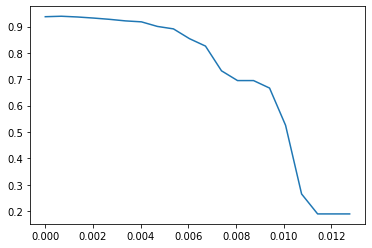

In [33]:
#同样的，我们也可以画学习曲线来找最佳阈值
#======【TIME WARNING：10 mins】======#
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

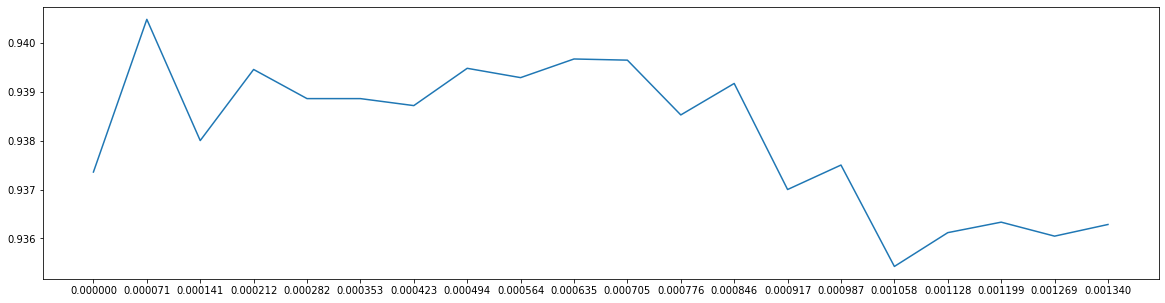

In [35]:
#======【TIME WARNING：10 mins】======#
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [36]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9392857142857144

In [37]:
#=====【TIME WARNING：2 min】=====#
#我们可能已经找到了现有模型下的最佳结果，如果我们调整一下随机森林的参数呢？
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9634285714285715

## **Wrapper包装法**

In [38]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators =10,random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)
selector.support_.sum()

340

In [39]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [40]:
X_wrapper = selector.transform(X)
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9379761904761905

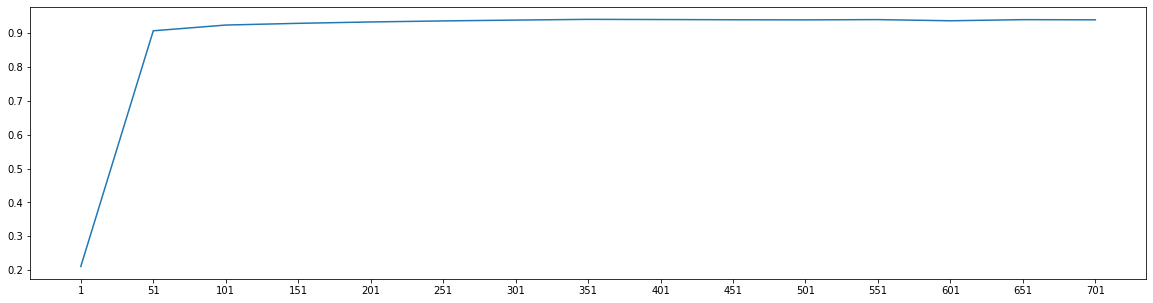

In [41]:
#======【TIME WARNING: 15 mins】======#
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()